Requirements:

Step 1:
Preprocess the data. Selection/generation/ transformation of categorical variables, useful variables etc all your discretion.

Step 2:
Build your models: Please build classification models in Python to predict the Survived binary status assigned to a passenger. When writing the code associated with each model, please have the first part produce and save the model, followed by a second part that loads and applies the model.

Step 3:
Test your models using the data found within the "Holdout_testing" file. Save the results of the final model (remember you will only predict the Survived column in holdout test set with your best model results) in a single, separate CSV titled "Titanic Results from" *insert your name.

Step 4:
Submit your work: Please submit all of your code for cleaning, prepping, and modeling your data, your "Results" file, a brief write-up comparing the pros and cons of the modeling techniques you used (no more than a paragraph). Your work will be scored on techniques used (appropriateness and complexity), model performance - measured by accuracy precision and F score - on the data hold out, an understanding of the techniques you compared in your write-up, and your overall code.


## After comparing with other machine learning models, I utilized logistic regression to predict the outcome of the survival based on the passenger data. One of the biggest advantage of logistic regression is that it is specifically designed to model binary outcomes, such as survival or death. This makes it well-suited to the Titanic data, where the goal is to predict whether a passenger survived or not. Also,  Logistic regression can handle multiple independent variables, which is useful in the Titanic data, where multiple factors such as age, fare, and cabin class may be relevant in predicting survival. However, Logistic Regression has limited ability to model complex interactions, which in this case the complexity is reduced by feature engineering.

In [212]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Importing Classifier Modules
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Preprocess the Data

In [2]:
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test=pd.read_csv('holdout_test.csv')
test.head()

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.shape

(418, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#df['Parch'].value_counts()
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked'] = df['Embarked'].fillna('S')
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [65]:
test['Embarked'] = test['Embarked'].fillna('S')
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [10]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

C:\Users\skyxt\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

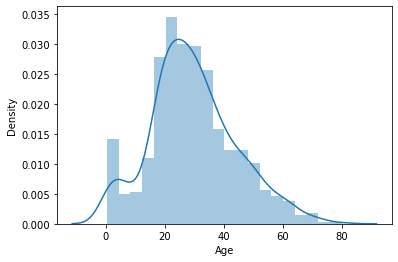

In [6]:
sns.distplot(df[df['Age'].notnull()]['Age'])

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
df['Age'] = df['Age'].interpolate()
df['Age'].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [66]:
test['Age'] = test['Age'].interpolate()
test['Age'].describe()

count    418.000000
mean      30.045251
std       13.502708
min        0.170000
25%       21.500000
50%       27.700000
75%       38.875000
max       76.000000
Name: Age, dtype: float64

In [7]:
len(df['Cabin'].unique())

148

In [17]:
df = df.drop('Cabin', axis=1)

In [67]:
test = test.drop('Cabin', axis=1)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df = df.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [68]:
test = test.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Pclass', ylabel='count'>

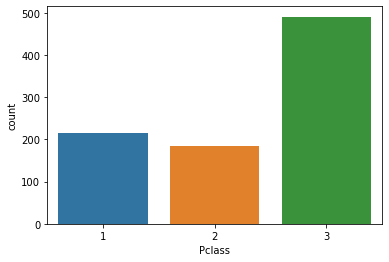

In [33]:
sns.countplot(x = 'Pclass', data=df)

C:\Users\skyxt\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


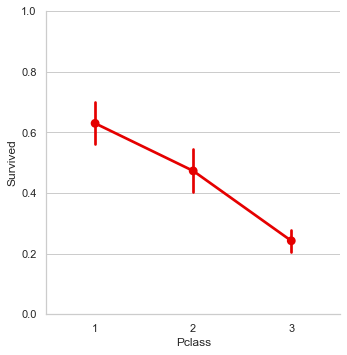

In [34]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=df, x_vars=['Pclass'], y_vars='Survived', size=5)
g.map(sns.pointplot, color=sns.xkcd_rgb["red"])
g.set(ylim=(0, 1))

C:\Users\skyxt\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


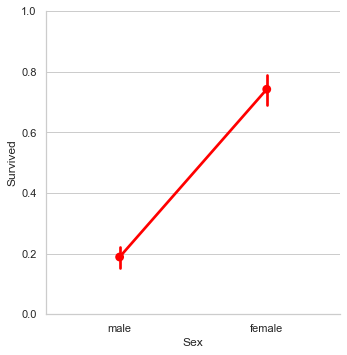

In [35]:
h = sns.PairGrid(data=df, x_vars=['Sex'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [36]:
df['is_child'] = df['Age'].apply(lambda x: 1 if x<=15 else 0)

In [69]:
test['is_child'] = test['Age'].apply(lambda x: 1 if x<=15 else 0)

In [37]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,is_child
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0
887,1,1,female,19.0,0,0,30.0000,S,0
888,0,3,female,22.5,1,2,23.4500,S,0
889,1,1,male,26.0,0,0,30.0000,C,0


C:\Users\skyxt\anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


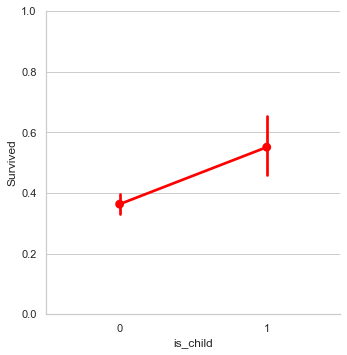

In [38]:
h = sns.PairGrid(data=df, x_vars=['is_child'], y_vars='Survived', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [40]:
df['family'] = df['SibSp'] + df['Parch']
df = df.drop(['SibSp', 'Parch'], axis=1)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,is_child,family
0,0,3,male,22.0,7.2500,S,0,1
1,1,1,female,38.0,71.2833,C,0,1
2,1,3,female,26.0,7.9250,S,0,0
3,1,1,female,35.0,53.1000,S,0,1
4,0,3,male,35.0,8.0500,S,0,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,0,0
887,1,1,female,19.0,30.0000,S,0,0
888,0,3,female,22.5,23.4500,S,0,3
889,1,1,male,26.0,30.0000,C,0,0


In [70]:
test['family'] = test['SibSp'] + test['Parch']
test = test.drop(['SibSp', 'Parch'], axis=1)
test

,Survived,Pclass,Sex,Age,Fare,Embarked,is_child,family
0,NaN,3,male,34.5,7.8292,Q,0,0
1,NaN,3,female,47.0,7.0000,S,0,1
2,NaN,2,male,62.0,9.6875,Q,0,0
3,NaN,3,male,27.0,8.6625,S,0,0
4,NaN,3,female,22.0,12.2875,S,0,2
...,...,...,...,...,...,...,...,...
413,NaN,3,male,33.5,8.0500,S,0,0
414,NaN,1,female,39.0,108.9000,C,0,0
415,NaN,3,male,38.5,7.2500,S,0,0
416,NaN,3,male,38.5,8.0500,S,0,0


In [41]:
df['is_alone'] = df['family'].apply(lambda x : 1 if x==0 else 0)

In [43]:
df['is_female'] = df['Sex'].apply(lambda x : 1 if x=="female" else 0)
df = df.drop('Sex', axis = 1)
df

,Survived,Pclass,Age,Fare,Embarked,is_child,family,is_alone,is_female
0,0,3,22.0,7.2500,S,0,1,0,0
1,1,1,38.0,71.2833,C,0,1,0,1
2,1,3,26.0,7.9250,S,0,0,1,1
3,1,1,35.0,53.1000,S,0,1,0,1
4,0,3,35.0,8.0500,S,0,0,1,0
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,S,0,0,1,0
887,1,1,19.0,30.0000,S,0,0,1,1
888,0,3,22.5,23.4500,S,0,3,0,1
889,1,1,26.0,30.0000,C,0,0,1,0


In [72]:
test['is_alone'] =test['family'].apply(lambda x : 1 if x==0 else 0)
test['is_female'] = test['Sex'].apply(lambda x : 1 if x=="female" else 0)
test = test.drop(['Sex','Survived'], axis = 1)
test

,Pclass,Age,Fare,Embarked,is_child,family,is_alone,is_female
0,3,34.5,7.8292,Q,0,0,1,0
1,3,47.0,7.0000,S,0,1,0,1
2,2,62.0,9.6875,Q,0,0,1,0
3,3,27.0,8.6625,S,0,0,1,0
4,3,22.0,12.2875,S,0,2,0,1
...,...,...,...,...,...,...,...,...
413,3,33.5,8.0500,S,0,0,1,0
414,1,39.0,108.9000,C,0,0,1,1
415,3,38.5,7.2500,S,0,0,1,0
416,3,38.5,8.0500,S,0,0,1,0


In [ ]:
df = pd.get_dummies(df, prefix=['is'])

In [51]:
df

,Survived,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,0,3,22.0,7.2500,0,1,0,0,0,0,1
1,1,1,38.0,71.2833,0,1,0,1,1,0,0
2,1,3,26.0,7.9250,0,0,1,1,0,0,1
3,1,1,35.0,53.1000,0,1,0,1,0,0,1
4,0,3,35.0,8.0500,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,13.0000,0,0,1,0,0,0,1
887,1,1,19.0,30.0000,0,0,1,1,0,0,1
888,0,3,22.5,23.4500,0,3,0,1,0,0,1
889,1,1,26.0,30.0000,0,0,1,0,1,0,0


In [ ]:
test = pd.get_dummies(test, prefix=['is'])

In [75]:
test

,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S
0,3,34.5,7.8292,0,0,1,0,0,1,0
1,3,47.0,7.0000,0,1,0,1,0,0,1
2,2,62.0,9.6875,0,0,1,0,0,1,0
3,3,27.0,8.6625,0,0,1,0,0,0,1
4,3,22.0,12.2875,0,2,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,33.5,8.0500,0,0,1,0,0,0,1
414,1,39.0,108.9000,0,0,1,1,1,0,0
415,3,38.5,7.2500,0,0,1,0,0,0,1
416,3,38.5,8.0500,0,0,1,0,0,0,1


# Step 2: Build Models
# Now, we finished feature engirering, and move to modeling

In [52]:
X, y = df.drop(['Survived'], axis=1), df['Survived']

In [53]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,stratify=y)

In [55]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [193]:
def dmp_first_classifier(model):
    classifier = model()
    classifier.fit(X_train, y_train)
    print(classifier.score(X_test, y_test))
    return classifier

In [238]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round( clf.score(X_test, y_test) * 100, 2)
print (str(acc_decision_tree) + ' percent')

precision_decision_tree = round(precision_score(y_test, y_pred_decision_tree),2)
recall_decision_tree = round(recall_score(y_test, y_pred_decision_tree),2)
f1_decision_tree = round(f1_score(y_test, y_pred_decision_tree), 2)
print(precision_decision_tree, recall_decision_tree, f1_decision_tree)


81.01 percent
0.8 0.68 0.73


In [299]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_test, y_test) * 100, 2)
print (str(acc_log_reg) + ' percent')

precision_log_reg = round(precision_score(y_test, y_pred_log_reg),2)
recall_log_reg = round(recall_score(y_test, y_pred_log_reg),2)
f1_log_reg = round(f1_score(y_test, y_pred_log_reg), 2)
print(precision_log_reg, recall_dlog_reg, f1_log_reg)

81.56 percent
0.79 0.71 0.75


C:\Users\skyxt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [240]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round( clf.score(X_test, y_test) * 100, 2)
print (acc_random_forest)

precision_random_forest = round(precision_score(y_test, y_pred_random_forest),2)
recall_random_forest = round(recall_score(y_test, y_pred_random_forest),2)
f1_random_forest = round(f1_score(y_test, y_pred_random_forest), 2)
print(precision_random_forest, recall_random_forest, f1_random_forest)

78.21
0.72 0.71 0.72


In [271]:
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round( clf.score(X_test, y_test) * 100, 2)
print (acc_svc)

precision_svc = round(precision_score(y_test, y_pred_svc),2)
recall_svc = round(recall_score(y_test, y_pred_svc),2)
f1_svc = round(f1_score(y_test, y_pred_svc), 2)
print(precision_svc, recall_svc, f1_svc)

77.65
0.72 0.7 0.71


In [270]:
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round( clf.score(X_test, y_test) * 100, 2)
print (acc_linear_svc)

precision_linear_svc = round(precision_score(y_test, y_pred_linear_svc),2)
recall_linear_svc = round(recall_score(y_test, y_pred_linear_svc),2)
f1_linear_svc = round(f1_score(y_test, y_pred_linear_svc), 2)
print(precision_linear_svc, recall_linear_svc, f1_linear_svc)

81.56
0.8 0.7 0.74


C:\Users\skyxt\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [257]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round( clf.score(X_test, y_test) * 100, 2)
print (acc_knn)

precision_knn = round(precision_score(y_test, y_pred_knn),2)
recall_knn = round(recall_score(y_test, y_pred_knn),2)
f1_knn = round(f1_score(y_test, y_pred_knn), 2)
print(precision_knn, recall_knn, f1_knn)

72.07
0.66 0.58 0.62


In [252]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round( clf.score(X_test, y_test) * 100, 2)
print (acc_gnb)

precision_gnb = round(precision_score(y_test, y_pred_gnb),2)
recall_gnb = round(recall_score(y_test, y_pred_gnb),2)
f1_gnb = round(f1_score(y_test, y_pred_gnb), 2)
print(precision_gnb, recall_gnb, f1_gnb)

81.56
0.8 0.7 0.74


In [253]:
clf = Perceptron()
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round( clf.score(X_test, y_test) * 100, 2)
print (acc_perceptron)

precision_perceptron = round(precision_score(y_test, y_pred_perceptron),2)
recall_perceptron = round(recall_score(y_test, y_pred_perceptron),2)
f1_perceptron = round(f1_score(y_test, y_pred_perceptron), 2)
print(precision_perceptron, recall_perceptron, f1_perceptron)

79.33
0.79 0.64 0.7


In [289]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round( clf.score(X_test, y_test) * 100, 2)
print (acc_sgd)

precision_sgd = round(precision_score(y_test, y_pred_sgd),2)
recall_sgd = round(recall_score(y_test, y_pred_sgd),2)
f1_sgd = round(f1_score(y_test, y_pred_sgd), 2)
print(precision_sgd, recall_sgd, f1_sgd)

79.89
0.73 0.75 0.74


In [290]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round( clf.score(X_test, y_test) * 100, 2)
print (acc_sgd)

precision_sgd = round(precision_score(y_test, y_pred_sgd),2)
recall_sgd = round(recall_score(y_test, y_pred_sgd),2)
f1_sgd = round(f1_score(y_test, y_pred_sgd), 2)
print(precision_sgd, recall_sgd, f1_sgd)

62.57
0.75 0.04 0.08


In [301]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Accuracy_Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd],
    
     'Precision_Score': [precision_log_reg, precision_svc, precision_linear_svc, 
              precision_knn,  precision_decision_tree, precision_random_forest, precision_gnb, 
              precision_perceptron, precision_sgd],
    
     'Recall_Score': [recall_log_reg, recall_svc, recall_linear_svc, 
              recall_knn,  recall_decision_tree, recall_random_forest, recall_gnb, 
              acc_perceptron, acc_sgd],
    
     'F1_Score': [f1_log_reg, f1_svc, f1_linear_svc, 
              f1_knn,  f1_decision_tree, f1_random_forest, f1_gnb, 
              f1_perceptron, f1_sgd]
    })

models.sort_values(by='Accuracy_Score', ascending=False)

,Model,Accuracy_Score,Precision_Score,Recall_Score,F1_Score
0,Logistic Regression,81.56,0.79,0.71,0.75
2,Linear SVC,81.56,0.80,0.70,0.74
6,Naive Bayes,81.56,0.80,0.70,0.74
4,Decision Tree,81.01,0.80,0.68,0.73
7,Perceptron,79.33,0.79,79.33,0.70
5,Random Forest,78.21,0.72,0.71,0.72
1,Support Vector Machines,77.65,0.72,0.70,0.71
3,KNN,72.07,0.66,0.58,0.62
8,Stochastic Gradient Decent,62.57,0.75,62.57,0.08


In [304]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_test, y_test) * 100, 2)
print (str(acc_log_reg) + ' percent')

precision_log_reg = round(precision_score(y_test, y_pred_log_reg),2)
recall_log_reg = round(recall_score(y_test, y_pred_log_reg),2)
f1_log_reg = round(f1_score(y_test, y_pred_log_reg), 2)
print(precision_log_reg, recall_dlog_reg, f1_log_reg)

81.56 percent
0.79 0.71 0.75


C:\Users\skyxt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [302]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Age        418 non-null    float64
 2   Fare       418 non-null    float64
 3   is_child   418 non-null    int64  
 4   family     418 non-null    int64  
 5   is_alone   418 non-null    int64  
 6   is_female  418 non-null    int64  
 7   is_C       418 non-null    uint8  
 8   is_Q       418 non-null    uint8  
 9   is_S       418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [81]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [82]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Age        418 non-null    float64
 2   Fare       418 non-null    float64
 3   is_child   418 non-null    int64  
 4   family     418 non-null    int64  
 5   is_alone   418 non-null    int64  
 6   is_female  418 non-null    int64  
 7   is_C       418 non-null    uint8  
 8   is_Q       418 non-null    uint8  
 9   is_S       418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Age        891 non-null    float64
 3   Fare       891 non-null    float64
 4   is_child   891 non-null    int64  
 5   family     891 non-null    int64  
 6   is_alone   891 non-null    int64  
 7   is_female  891 non-null    int64  
 8   is_C       891 non-null    uint8  
 9   is_Q       891 non-null    uint8  
 10  is_S       891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


# Step 3: Test the Models

In [306]:
# Use logistic regression for test data:
Results = clf.predict(test)
Results

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [309]:
test['Survived'] = Results
test['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [310]:
test

,Pclass,Age,Fare,is_child,family,is_alone,is_female,is_C,is_Q,is_S,Survived
0,3,34.5,7.8292,0,0,1,0,0,1,0,0
1,3,47.0,7.0000,0,1,0,1,0,0,1,1
2,2,62.0,9.6875,0,0,1,0,0,1,0,0
3,3,27.0,8.6625,0,0,1,0,0,0,1,0
4,3,22.0,12.2875,0,2,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
413,3,33.5,8.0500,0,0,1,0,0,0,1,0
414,1,39.0,108.9000,0,0,1,1,1,0,0,1
415,3,38.5,7.2500,0,0,1,0,0,0,1,0
416,3,38.5,8.0500,0,0,1,0,0,0,1,0


In [312]:
#Saving the results
test.to_csv('Titanic Results from Neal Xu.csv')